In [2]:
import csv
import pandas

# make a compiled dictionary of each player's total stats across the entire tournament
with open("Datasets/Match player statistics.csv", encoding="utf-8-sig") as f:
    names_map = {}
    reader = csv.DictReader(f)
    for line in reader:
        name = line["PlayerName"] + " " + line["PlayerSurname"]
        if "Time" not in line["StatsName"] and line["Value"] != "" and line["StatsName"] != "Position heatmap":
            if name in names_map:
                    if line["StatsName"] in names_map[name]:
                        names_map[name][line["StatsName"]] = names_map[name][line["StatsName"]] + float(line["Value"])
                    else:
                        names_map[name][line["StatsName"]] = float(line["Value"])
            else:
                names_map[name] = {line["StatsName"]:float(line["Value"])}
        elif "Time" in line["StatsName"] and ":" in line["Value"]:
            splits = [float(x) for x in line["Value"].split(":")]

            time_seconds = splits[0] * 60 * 60 + splits[1] * 60 + splits[2]
            if name in names_map and line["StatsName"] in names_map[name]:
                names_map[name][line["StatsName"]] = names_map[name][line["StatsName"]] + time_seconds
            elif name in names_map:
                names_map[name][line["StatsName"]] = time_seconds
            else:
                names_map[name] = {line["StatsName"]:time_seconds}

names_map.keys()

dict_keys(['Julian Baumgartlinger', 'Andreas Ulmer', 'Stefan Ilsanker', 'Marko Arnautovic', 'David Alaba', 'Aleksandar Dragovic', 'Stefan Lainer', 'Martin Hinteregger', 'Michael Gregoritsch', 'Marcel Sabitzer', 'Daniel Bachmann', 'Xaver Schlager', 'Konrad Laimer', 'Philipp Lienhart', 'Christoph Baumgartner', 'Sasa Kalajdzic', 'Goran Pandev', 'Ivan Trickovski', 'Stefan Ristovski', 'Arijan Ademi', 'Stole Dimitrievski', 'Visar Musliu', 'Ezgjan Alioski', 'Darko Velkoski', 'Aleksandar Trajkovski', 'Boban Nikolov', 'Tihomir Kostadinov', 'Egzon Bejtulai', 'Enis Bardi', 'Milan Ristovski', 'Eljif Elmas', 'Thomas Vermaelen', 'Toby Alderweireld', 'Axel Witsel', 'Jan Vertonghen', 'Kevin De Bruyne', 'Romelu Lukaku', 'Thibaut Courtois', 'Thorgan Hazard', 'Dries Mertens', 'Nacer Chadli', 'Dennis Praet', 'Thomas Meunier', 'Youri Tielemans', 'Jeremy Doku', 'Giorgio Chiellini', 'Ciro Immobile', 'Marco Verratti', 'Leonardo Bonucci', 'Leonardo Spinazzola', 'Lorenzo Insigne', 'Bryan Cristante', 'Andrea Bel

In [3]:

player_stats = pandas.DataFrame.from_dict(names_map).transpose()
player_stats.columns




Index(['Goals', 'Total Attempts', 'Attempts on target', 'Attempts off target',
       'Attempts against woodwork', 'Attempts Accuracy', 'Corners', 'Offsides',
       'Saves', 'Tackles won',
       ...
       'Distance covered not in possession (m)',
       'Distance covered not in possession (Km)', 'Attempts set pieces',
       'Attempts in open play', 'Attempts on throw in',
       'Saves on attempts inside penalty area',
       'Saves on attempts outside penalty area', 'Big Chances',
       'Time spent in penalty area', 'Time spent in attacking third'],
      dtype='object', length=175)

In [4]:
player_stats.describe()

,Goals,Total Attempts,Attempts on target,Attempts off target,Attempts against woodwork,Attempts Accuracy,Corners,Offsides,Saves,Tackles won,...,Distance covered not in possession (m),Distance covered not in possession (Km),Attempts set pieces,Attempts in open play,Attempts on throw in,Saves on attempts inside penalty area,Saves on attempts outside penalty area,Big Chances,Time spent in penalty area,Time spent in attacking third
count,490.000000,488.000000,488.000000,488.000000,488.000000,488.000000,490.000000,490.000000,488.000000,488.000000,...,490.000000,490.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,444.000000,462.000000
mean,0.263265,2.446721,0.805328,1.034836,0.067623,40.094262,0.904082,0.357143,0.563525,1.061475,...,9091.357143,9.076918,0.120902,2.323770,0.008197,0.360656,0.196721,0.133197,480.145171,2536.631424
std,0.727827,3.533534,1.505981,1.612584,0.274772,64.722432,2.886571,0.909504,2.610998,1.594495,...,6761.802922,6.756552,0.491962,3.302306,0.090256,1.705484,0.989799,0.484550,618.870371,2732.949137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.320000,1.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3276.000000,3.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.490000,662.500000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8429.000000,8.405000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,262.720000,1617.820000
75%,0.000000,3.000000,1.000000,1.000000,0.000000,67.000000,0.000000,0.000000,0.000000,2.000000,...,13488.250000,13.470000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,618.320000,3558.590000
max,5.000000,20.000000,9.000000,10.000000,2.000000,367.000000,19.000000,7.000000,21.000000,9.000000,...,36022.000000,35.990000,6.000000,19.000000,1.000000,15.000000,8.000000,5.000000,4335.280000,16994.120000


In [5]:
goalscorers = player_stats[player_stats["Goals"] > 0]
multi_goalscorers = goalscorers[goalscorers["Goals"] > 1]
multi_goalscorers

,Goals,Total Attempts,Attempts on target,Attempts off target,Attempts against woodwork,Attempts Accuracy,Corners,Offsides,Saves,Tackles won,...,Distance covered not in possession (m),Distance covered not in possession (Km),Attempts set pieces,Attempts in open play,Attempts on throw in,Saves on attempts inside penalty area,Saves on attempts outside penalty area,Big Chances,Time spent in penalty area,Time spent in attacking third
Romelu Lukaku,4.0,13.0,6.0,2.0,0.0,167.0,0.0,5.0,0.0,0.0,...,13901.0,13.89,2.0,11.0,0.0,0.0,0.0,1.0,3390.240,11181.160
Thorgan Hazard,2.0,4.0,3.0,0.0,0.0,250.0,0.0,0.0,0.0,2.0,...,17719.0,17.69,0.0,4.0,0.0,0.0,0.0,0.0,368.600,3810.640
Ciro Immobile,2.0,18.0,3.0,9.0,1.0,58.0,0.0,6.0,0.0,0.0,...,19533.0,19.52,0.0,18.0,0.0,0.0,0.0,0.0,3167.880,12879.360
Lorenzo Insigne,2.0,19.0,7.0,9.0,0.0,177.0,14.0,4.0,0.0,1.0,...,22099.0,22.09,3.0,16.0,0.0,0.0,0.0,0.0,1234.640,11977.800
Federico Chiesa,2.0,17.0,6.0,6.0,0.0,225.0,0.0,0.0,0.0,1.0,...,17634.0,17.60,0.0,17.0,0.0,0.0,0.0,0.0,1267.360,10067.000
Cristiano Ronaldo,5.0,16.0,8.0,5.0,0.0,200.0,0.0,2.0,0.0,1.0,...,11983.0,11.97,6.0,10.0,0.0,0.0,0.0,1.0,2639.360,10519.320
Ivan Perišic,2.0,7.0,3.0,2.0,0.0,125.0,0.0,2.0,0.0,2.0,...,9660.0,9.65,0.0,7.0,0.0,0.0,0.0,0.0,869.360,4764.320
Patrik Schick,5.0,16.0,9.0,5.0,0.0,208.0,0.0,2.0,0.0,0.0,...,17039.0,17.01,2.0,14.0,0.0,0.0,0.0,3.0,2589.292,9163.384
Pablo Sarabia,2.0,8.0,4.0,4.0,1.0,183.0,7.0,1.0,0.0,1.0,...,8959.0,8.94,0.0,8.0,0.0,0.0,0.0,0.0,1132.640,7490.560
Álvaro Morata,3.0,16.0,9.0,4.0,0.0,275.0,0.0,4.0,0.0,0.0,...,15048.0,15.02,1.0,15.0,0.0,0.0,0.0,3.0,3825.920,14546.680


<AxesSubplot:xlabel='Goals'>

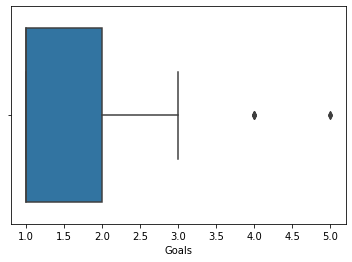

In [6]:
import seaborn as sns
sns.boxplot(data=goalscorers, x="Goals")

<AxesSubplot:xlabel='Time spent in attacking third', ylabel='Goals'>

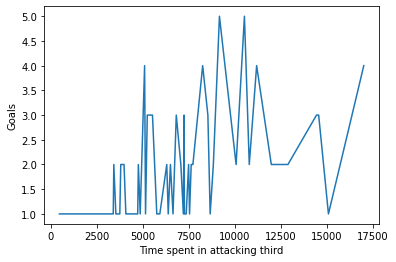

In [7]:
sns.lineplot(data=goalscorers, x="Time spent in attacking third", y="Goals")

<AxesSubplot:xlabel='Time spent in attacking third', ylabel='Assists'>

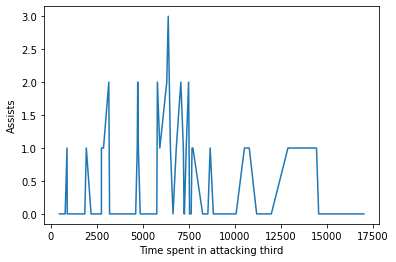

In [8]:
sns.lineplot(data=goalscorers, x="Time spent in attacking third", y="Assists")